In [1]:
import numpy as np
from numpy import meshgrid
import matplotlib.pyplot as plt
from optim import *

In [ ]:
# import importlib
# importlib.reload(utils)

## Visualize

In [4]:
from utils import F

### Plot function contour

In [5]:
def plot_f_contour(loss_fn, r_min, r_max, save_img_path=None):
    plt.figure(figsize=(12, 8))
    x_axis, y_axis, loss_val = contour_data(r_min, r_max, loss_fn, 0.2)    
    contour = plt.contourf(x_axis, y_axis, loss_val, 50, alpha=1.0, cmap='jet')

    cbar = plt.colorbar(contour)
    cbar.set_label('Loss Value', rotation=270, labelpad=15)
    if save_img_path is not None:
        plt.savefig(save_img_path)
    plt.show()

In [6]:
fns = [
    'loss_fn_1', 'loss_fn_2', 'rastrigin', 'mccormick',
    'ackley', 'booth', 'complex', 'himmelblau'
]

In [ ]:
for fn in fns:
    print(fn)
    plot_f_contour(eval(f"F.{fn}"), -10, 10, save_img_path=f'./imgs/{fn}_contour.png')

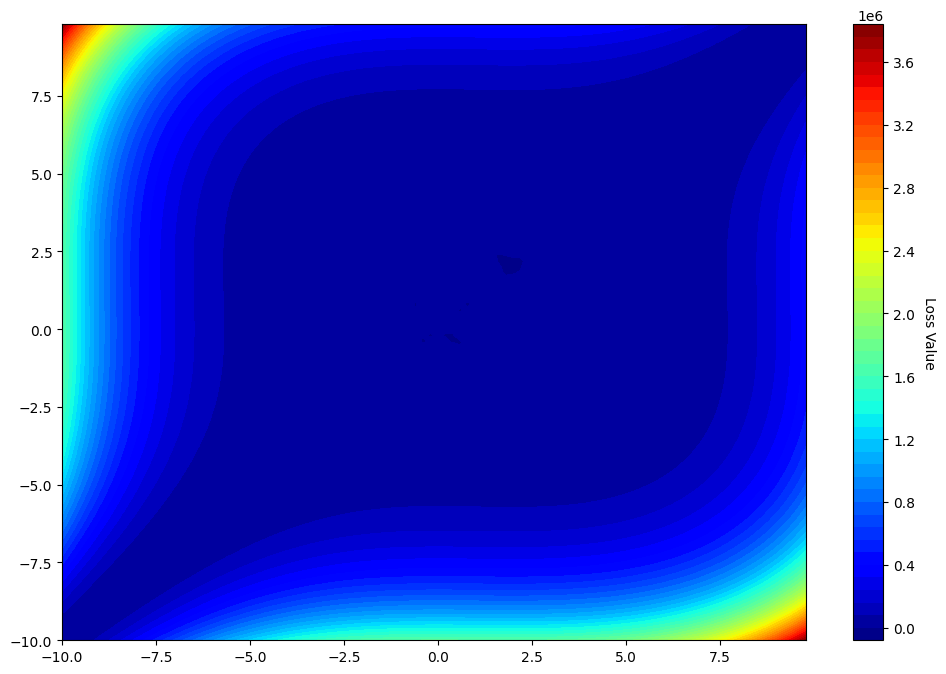

In [347]:
plot_f_contour(F.complex, -10, 10)

### Optimizer

### Train

In [7]:
def train(x, y, epochs, loss_fn, opt, grad_fn):
    loss = []
    coord = [(x, y)]
    for i in range(epochs):
        loss_val = loss_fn(x, y)
        loss.append(loss_val)
        grad_x, grad_y = grad_fn(x, y)
        x, y = opt.forward([x, y], [grad_x, grad_y])
        coord.append((x, y))
        if i % 50 == 0:
            print(f"epoch {i}, loss: {loss_val}")
    return loss, coord

def contour_data(r_min, r_max, loss_fn, step=0.1):
    x_axis = np.arange(r_min, r_max, step)
    y_axis = np.arange(r_min, r_max, step)
    
    x, y = meshgrid(x_axis, y_axis)
    loss_val = loss_fn(x, y)
    return x_axis, y_axis, loss_val

In [8]:
def one_exp(
    loss_fn,
    grad_fn,
    opt,
    epochs,
    r_min,
    r_max,
    x = None,
    y = None,
    save_img_path=None,
):
    if x is None:
        x = np.random.uniform(low=r_min, high=r_max)
    if y is None:
        y = np.random.uniform(low=r_min, high=r_max)
    print(f'using x={x}, y={y}')
    loss, coord = train(x, y, lr=lr, epochs=epochs, loss_fn=loss_fn, opt=opt, grad_fn=grad_fn)
    x, y, loss_val = contour_data(r_min, r_max, loss_fn)

    plt.figure(figsize=(12, 8))
    contour = plt.contourf(x, y, loss_val, 50, alpha=1.0, cmap='jet')
    cbar = plt.colorbar(contour)
    cbar.set_label('Loss Value', rotation=270, labelpad=15)
    
    for i, (x_c, y_c) in enumerate(coord):
        plt.plot(x_c, y_c, '+', color='white')
    if save_img_path is not None:
        plt.savefig(save_img_path)
    plt.show()

using x=4.0013, y=0.3887
epoch 0, loss: 269.93862795158583
epoch 50, loss: 0.45746739800273456
epoch 100, loss: 0.09402190505397912
epoch 150, loss: 0.025314738765226025


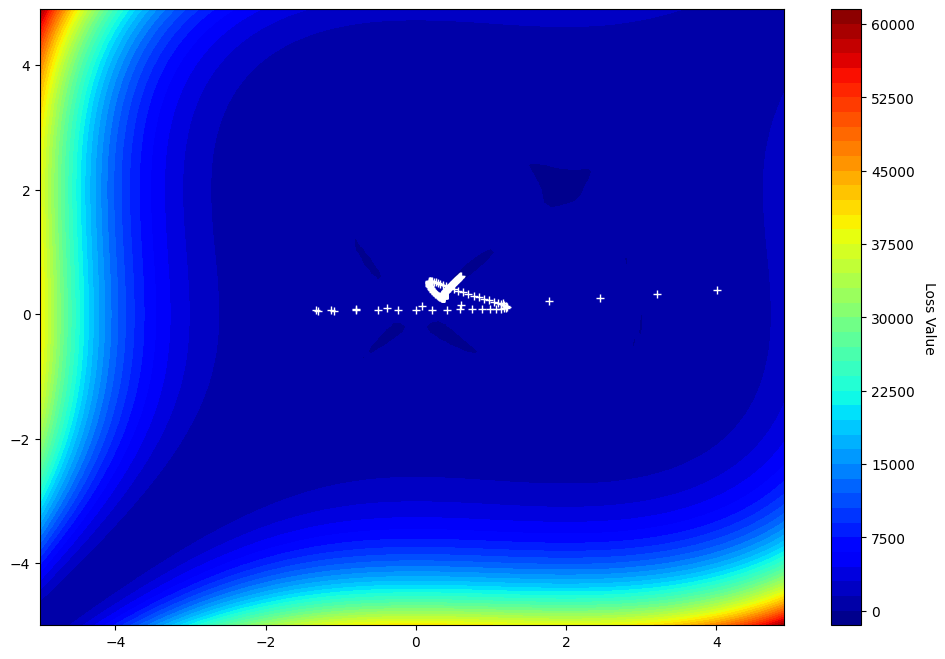

In [375]:
one_exp(F.complex, F.complex_grad, Momentum(lr=1e-3), 200, -5, 5, 4.0013, 0.3887)

In [10]:
one_exp(F.loss_fn_2, F.loss_2_grad, SGD(lr=1e-3), 200, -10, 10, 3, 3, './imgs/sgd_1e-3.png')

using x=3, y=3


NameError: name 'lr' is not defined

using x=3.0, y=3.0
epoch 0, loss: 103.5
epoch 50, loss: 3.241767495905901
epoch 100, loss: 0.48881433153820875
epoch 150, loss: -0.244895269952765


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (0, 0)

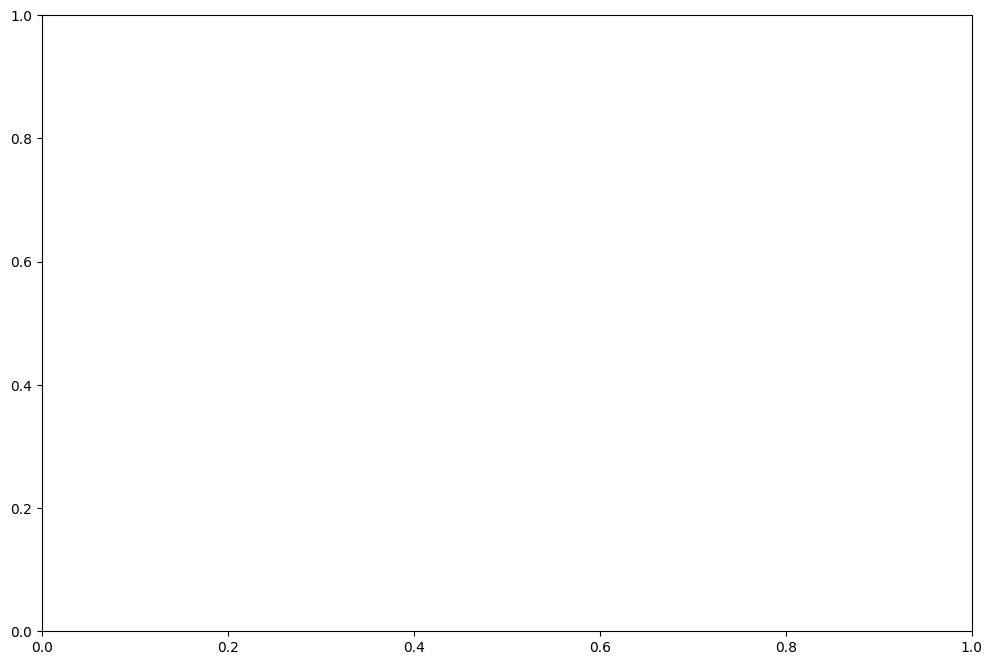

In [379]:
one_exp(loss_fn_2, grad_loss_2, Momentum(lr=1e-3, beta=0.9), 200, 3, 3)

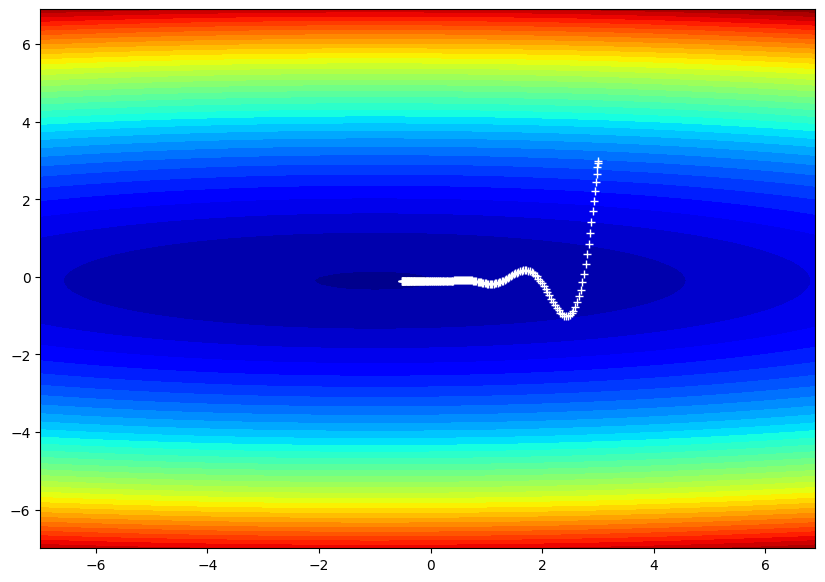

In [212]:
plt.figure(figsize=(10, 7))
plt.contourf(x, y, loss_val, 50, alpha=1.0, cmap='jet')

for i, (x_c, y_c) in enumerate(coord):
    plt.plot(x_c, y_c, '+', color='white')

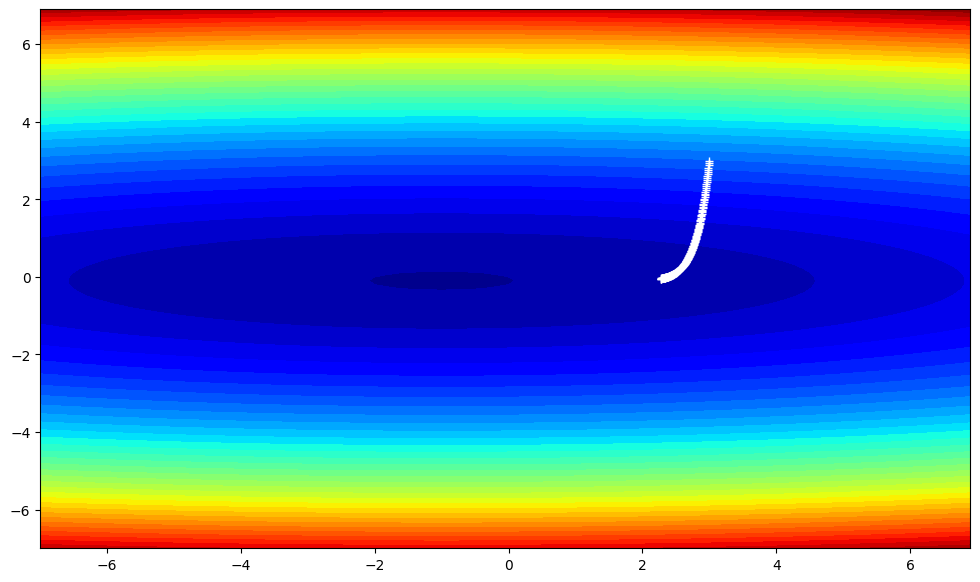

In [178]:
plt.figure(figsize=(10, 7))
plt.contourf(x, y, loss_val, 50, alpha=1.0, cmap='jet')

for i, (x_c, y_c) in enumerate(coord):
    plt.plot(x_c, y_c, '+', color='white')

In [11]:
def f(x, a, p):
    return 1 - (1-p) * np.exp(-a*x)

a = 1
p = 0.3
x = np.linspace(0, 10, 1000)
y = f(x, a, p)

plt.plot(x, y)

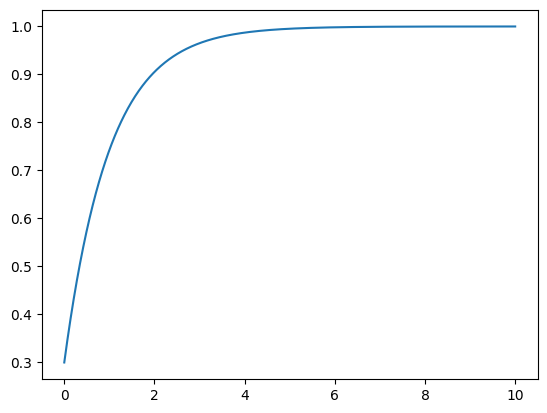